In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets('/tmp/data')

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [6]:
n_inputs=28*28
hidden1=256
hidden2=64
n_outputs=10

In [7]:
#creating placeholders
x=tf.placeholder(tf.float32,shape=(None,n_inputs),name='x')
y=tf.placeholder(tf.int32,shape=(None),name='y')

In [8]:
with tf.name_scope('dnn'):
    firstlayer=tf.layers.dense(x,hidden1,name='hidden1',activation=tf.nn.relu)
    secondlayer=tf.layers.dense(firstlayer,hidden2,name='hidden2',activation=tf.nn.relu)
    logits=tf.layers.dense(secondlayer,n_outputs,name='output')

In [9]:
with tf.name_scope('loss'):
    xentropy=tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits,labels=y)
    loss=tf.reduce_mean(xentropy,name='loss')

In [10]:
with tf.name_scope('train'):
    training_op=tf.train.GradientDescentOptimizer(0.01).minimize(loss)

In [11]:
with tf.name_scope('eval'):
    correct=tf.nn.in_top_k(logits,y,1)
    accuracy=tf.reduce_mean(tf.cast(correct,tf.float32))

In [13]:
init=tf.global_variables_initializer()
saver=tf.train.Saver()

In [16]:
#train a model
n_epochs=40
batch_size=64
n_batches=mnist.train.num_examples//batch_size
acc_tr=[]
acc_ts=[]

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for i in range(n_batches):
            xbatch,ybatch=mnist.train.next_batch(batch_size)
            sess.run(training_op,feed_dict={x:xbatch,y:ybatch})
        
        acc_train=accuracy.eval(feed_dict={x:xbatch,y:ybatch})
        acc_test=accuracy.eval(feed_dict={x:mnist.test.images,y:mnist.test.labels})
        acc_tr.append(acc_train)
        acc_ts.append(acc_test)
        print('epochs:',epoch,'accuracy_train:',acc_train,"accuracy_test:",acc_test)
    

epochs: 0 accuracy_train: 0.921875 accuracy_test: 0.8941
epochs: 1 accuracy_train: 0.9375 accuracy_test: 0.9127
epochs: 2 accuracy_train: 0.90625 accuracy_test: 0.9223
epochs: 3 accuracy_train: 0.90625 accuracy_test: 0.9251
epochs: 4 accuracy_train: 0.953125 accuracy_test: 0.9349
epochs: 5 accuracy_train: 0.953125 accuracy_test: 0.939
epochs: 6 accuracy_train: 0.953125 accuracy_test: 0.9434
epochs: 7 accuracy_train: 0.96875 accuracy_test: 0.946
epochs: 8 accuracy_train: 0.9375 accuracy_test: 0.9494
epochs: 9 accuracy_train: 0.96875 accuracy_test: 0.9514
epochs: 10 accuracy_train: 0.96875 accuracy_test: 0.9542
epochs: 11 accuracy_train: 0.9375 accuracy_test: 0.9564
epochs: 12 accuracy_train: 0.90625 accuracy_test: 0.957
epochs: 13 accuracy_train: 0.953125 accuracy_test: 0.9598
epochs: 14 accuracy_train: 0.96875 accuracy_test: 0.9605
epochs: 15 accuracy_train: 1.0 accuracy_test: 0.9623
epochs: 16 accuracy_train: 0.96875 accuracy_test: 0.9635
epochs: 17 accuracy_train: 0.96875 accuracy_te

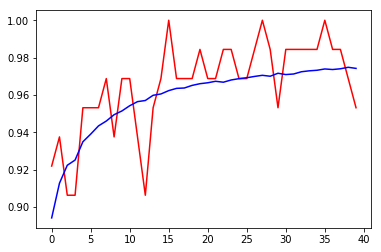

In [22]:
plt.plot(acc_tr,color='red')
plt.plot(acc_ts,color='blue')